### Tech Challenge - Análise e Previsão de Fatores de Estresse em Estudantes

#### 📌 Definição do Problema

* **Problema de Negócio:** Desenvolver uma solução que permita a instituições de ensino identificar estudantes com risco de estresse elevado, possibilitando a criação de programas de apoio mais direcionados e eficazes.
* **Objetivo Técnico:** O problema foi enquadrado como um desafio de **Classificação Multiclasse**. O objetivo é treinar um modelo de Machine Learning para prever o nível de estresse de um estudante em uma de três categorias (0: baixo, 1: médio, 2: alto), utilizando a coluna `stress_level` como variável-alvo.

#### 📌 Coleta de Dados

* **Fonte dos Dados:** Foi utilizado um dataset público da plataforma Kaggle, chamado "Student Stress Factors - A Comprehensive Analysis".
* **Justificativa:** A utilização de um dataset já existente foi uma decisão estratégica para otimizar o tempo e concentrar os esforços do projeto nas etapas de Análise, Modelagem e Deploy, que são o foco do desafio.

#### 📌 Armazenamento dos Dados

* **Solução Adotada:** Para simular um ambiente de produção e garantir a reprodutibilidade, os dados foram armazenados em um sistema de armazenamento de objetos local (MinIO)].
* **Processo:** Um bucket chamado `student-stress` foi criado no servidor MinIO , e o dataset `StressLevelDataset.csv` foi carregado, tornando-se acessível via serviço para a etapa de análise.

#### 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import boto3
from io import BytesIO

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#### 2. Conexão com o MinIO e Carregamento dos Dados

In [2]:
# Configurações de conexão com o MinIO
MINIO_ENDPOINT = "127.0.0.1:9000"
MINIO_ACCESS_KEY = "minioadmin"  # Use o seu usuário
MINIO_SECRET_KEY = "minioadmin"  # Use a sua senha
BUCKET_NAME = "student-stress"
OBJECT_NAME = "StressLevelDataset.csv"

# Criar um cliente S3 compatível para interagir com o MinIO
s3_client = boto3.client(
    "s3",
    endpoint_url=f"http://{MINIO_ENDPOINT}",
    aws_access_key_id=MINIO_ACCESS_KEY,
    aws_secret_access_key=MINIO_SECRET_KEY,
    aws_session_token=None,
    config=boto3.session.Config(signature_version="s3v4"),
)

# Tentar carregar o objeto do bucket
try:
    response = s3_client.get_object(Bucket=BUCKET_NAME, Key=OBJECT_NAME)
    # Ler o conteúdo do objeto em um DataFrame do Pandas
    # O BytesIO trata os bytes do objeto como um arquivo em memória
    df = pd.read_csv(BytesIO(response["Body"].read()))
    print("Dataset carregado com sucesso do MinIO!")
except Exception as e:
    print(f"Erro ao carregar o dataset do MinIO: {e}")

Dataset carregado com sucesso do MinIO!


#### 3. Inspeção Inicial do DataFrame

In [3]:
# Visualizar as 5 primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
display(df.head())

# Obter informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
print("\nInformações gerais do DataFrame:")
df.info()

# Obter estatísticas descritivas para as colunas numéricas
print("\nEstatísticas Descritivas:")
display(df.describe())

# Verificar as dimensões do dataset (linhas, colunas)
print(f"\nO dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Primeiras 5 linhas do dataset:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1



Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13 

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000



O dataset possui 1100 linhas e 21 colunas.


#### Análise Preliminar e Qualidade dos Dados

A inspeção inicial do dataset, realizada através dos comandos `.info()`, `.describe()` e `.head()`, revelou os seguintes insights cruciais que guiarão as próximas etapas:

* **Ausência de Dados Faltantes:** Todas as 21 colunas contêm 1100 registros não nulos. Isso indica uma excelente qualidade de dados e nos isenta da necessidade de aplicar técnicas de tratamento de valores ausentes (imputação).

* **Formato Numérico Uniforme:** Todas as variáveis são do tipo `int64`, o que simplifica a etapa de pré-processamento, pois não será necessário realizar a conversão de tipos de dados (ex: *encoding* de variáveis categóricas textuais).

* **Natureza Implícita das Variáveis:** Apesar do tipo `int64`, a análise semântica e estatística (`min`, `max`) sugere que as colunas representam diferentes tipos de dados. Temos uma mistura de variáveis que, na prática, são categóricas binárias (ex: `mental_health_history`), ordinais (escalas de 0 a 5) e a variável-alvo multiclasse (`stress_level`), que é o foco da nossa previsão.

#### 4. Verificação de Linhas Duplicadas

In [4]:
# Contar o número de linhas completamente duplicadas no DataFrame
num_duplicates = df.duplicated().sum()

print(f"Número de linhas duplicadas encontradas: {num_duplicates}")

Número de linhas duplicadas encontradas: 0


#### 5. Análise da Variável-Alvo (stress_level)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_7764\470617851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stress_level", data=df, palette="viridis")


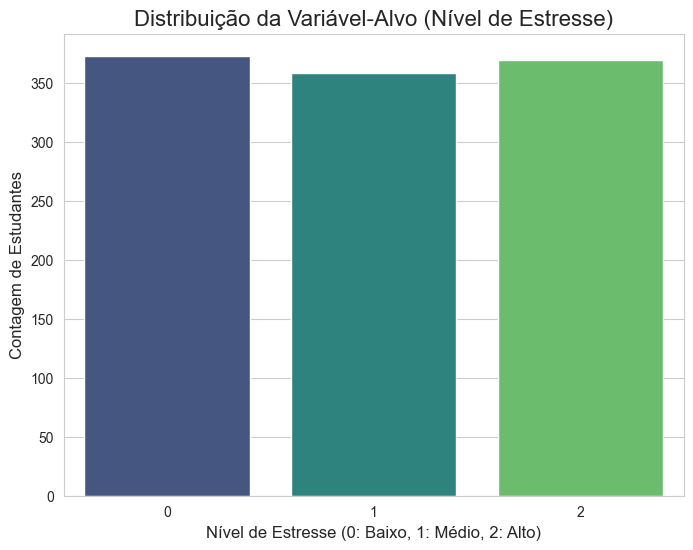

Contagem de valores para cada nível de estresse:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64


In [5]:
# --- Análise Univariada ---

# 1. Análise da Variável-Alvo: stress_level
plt.figure(figsize=(8, 6))
sns.countplot(x="stress_level", data=df, palette="viridis")

# Adicionando títulos e rótulos para maior clareza
plt.title("Distribuição da Variável-Alvo (Nível de Estresse)", fontsize=16)
plt.xlabel("Nível de Estresse (0: Baixo, 1: Médio, 2: Alto)", fontsize=12)
plt.ylabel("Contagem de Estudantes", fontsize=12)

# Exibindo o gráfico
plt.show()

# Para complementar o gráfico, vamos exibir a contagem exata de cada classe
print("Contagem de valores para cada nível de estresse:")
print(df["stress_level"].value_counts())

#### Conclusão sobre a Variável-Alvo

A análise da distribuição da variável `stress_level` mostra que as três classes (0: Baixo, 1: Médio, 2: Alto) estão **muito bem balanceadas**. Com contagens de 373, 358 e 369 respectivamente, temos uma base sólida e imparcial para o treinamento do modelo de classificação, eliminando a necessidade de técnicas de balanceamento de classes.

#### Resumo da Análise de Qualidade dos Dados

A análise de qualidade, que incluiu a verificação de valores ausentes e registros duplicados, revelou um dataset excepcionalmente limpo. As principais conclusões são:

* **Dados Completos:** Não foi encontrado **nenhum valor ausente** em nenhuma das 21 colunas.
* **Dados Únicos:** A verificação confirmou que não há **nenhuma linha duplicada** no conjunto de dados.
* **Formato Adequado:** Todas as variáveis já estão no formato numérico (`int64`), o que simplifica as etapas futuras de pré-processamento.

Com base nisso, a fase de limpeza de dados é considerada concluída, e podemos prosseguir com confiança para a análise de distribuição das variáveis.

#### 6. Histogramas de Todas as Variáveis Preditivas

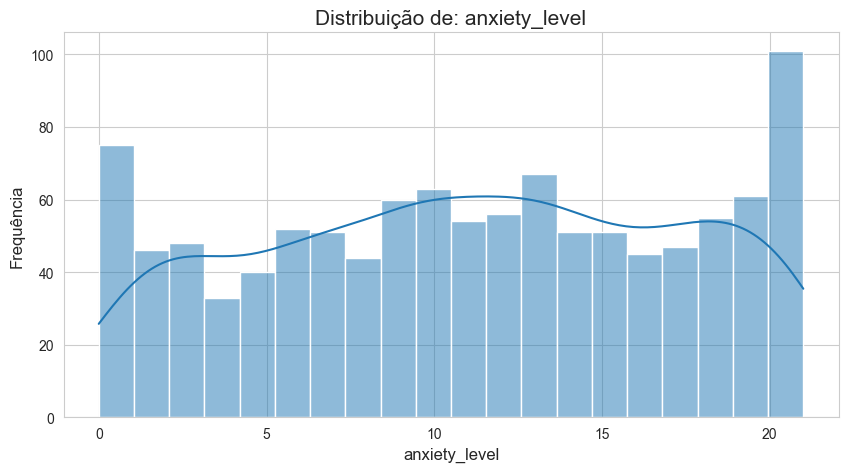

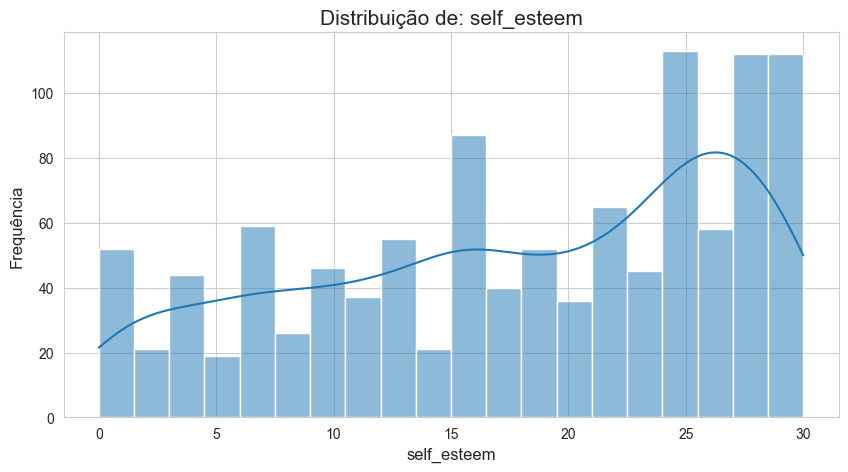

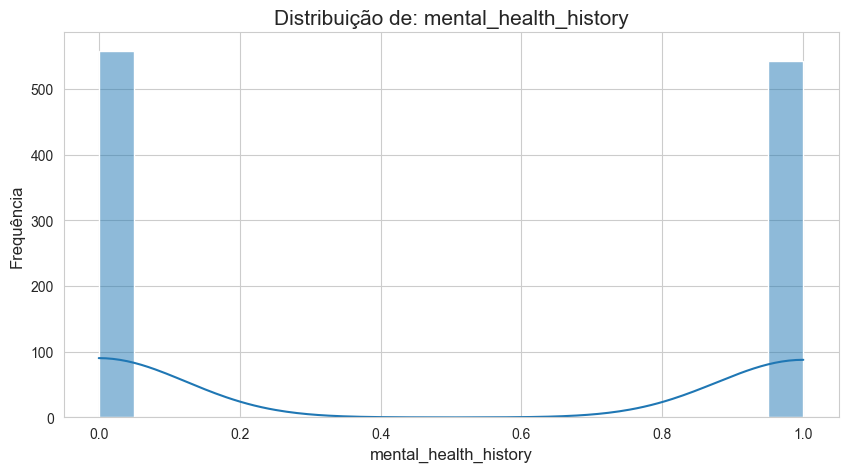

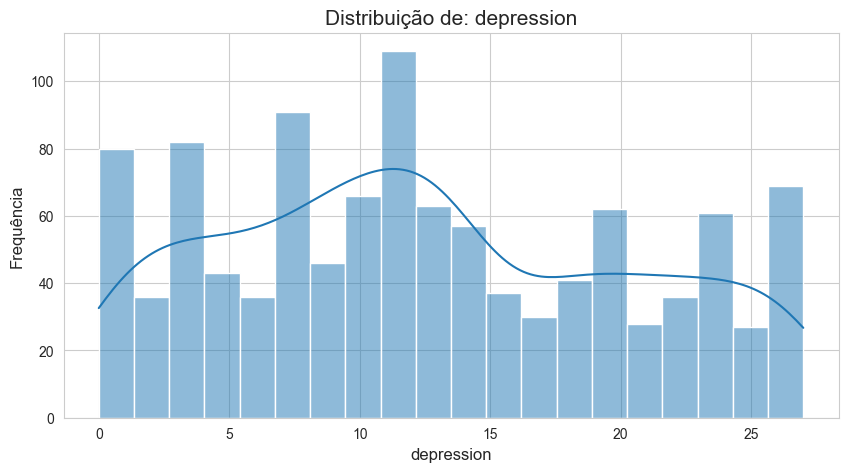

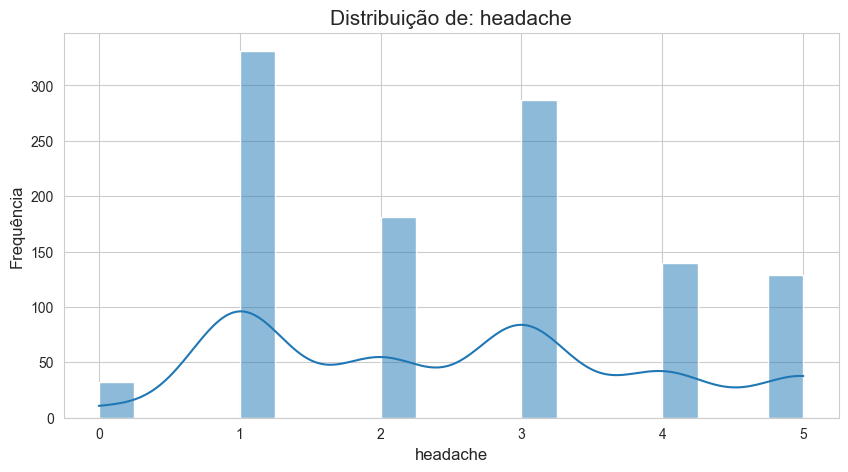

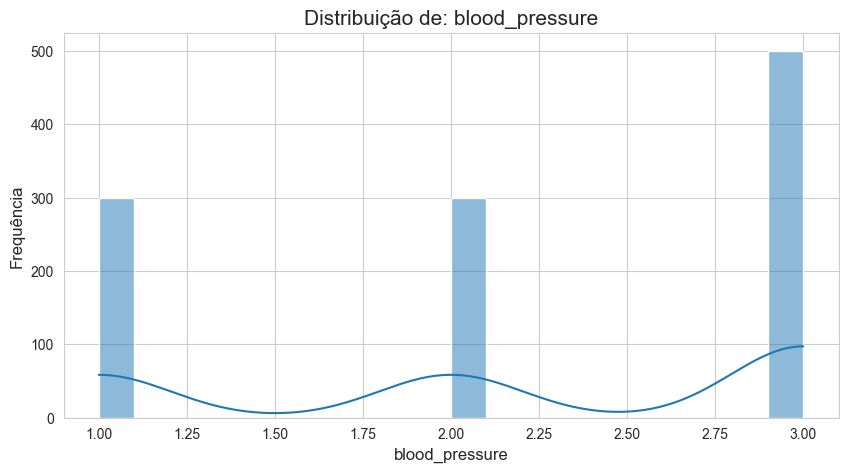

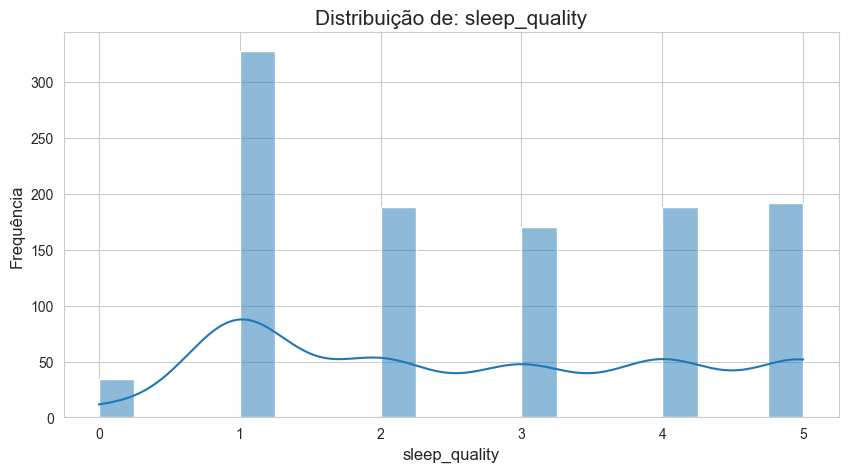

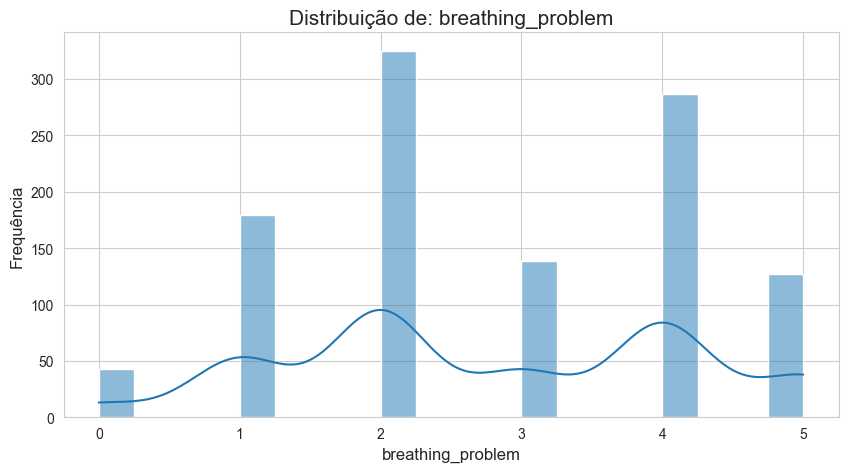

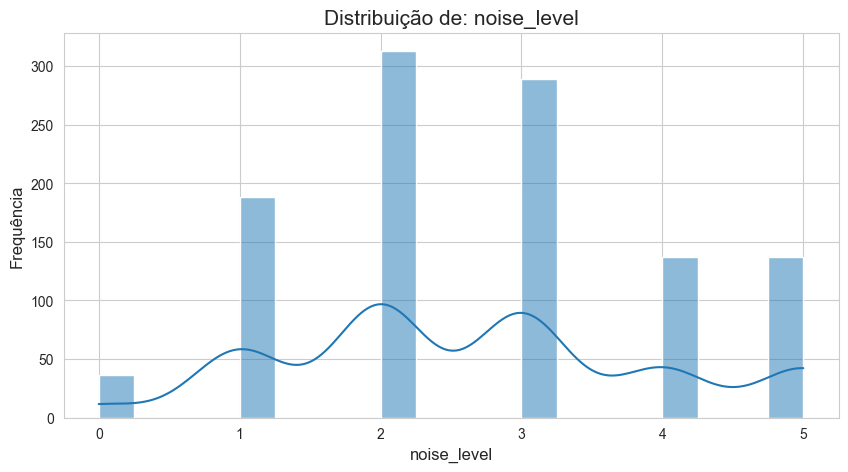

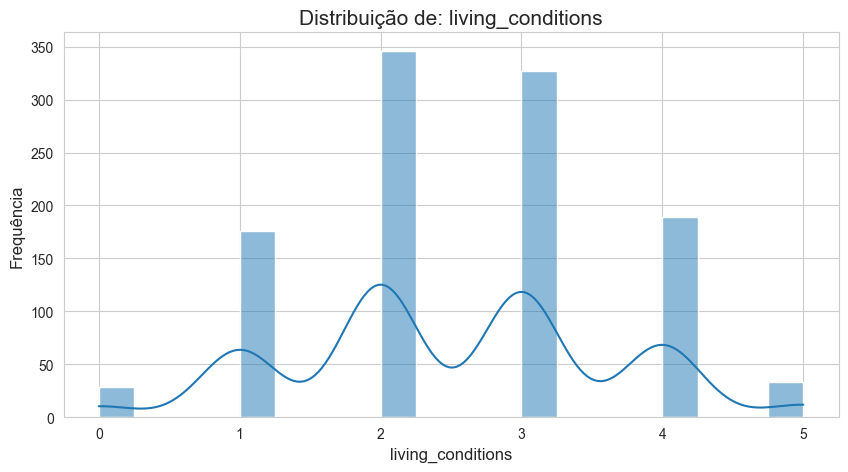

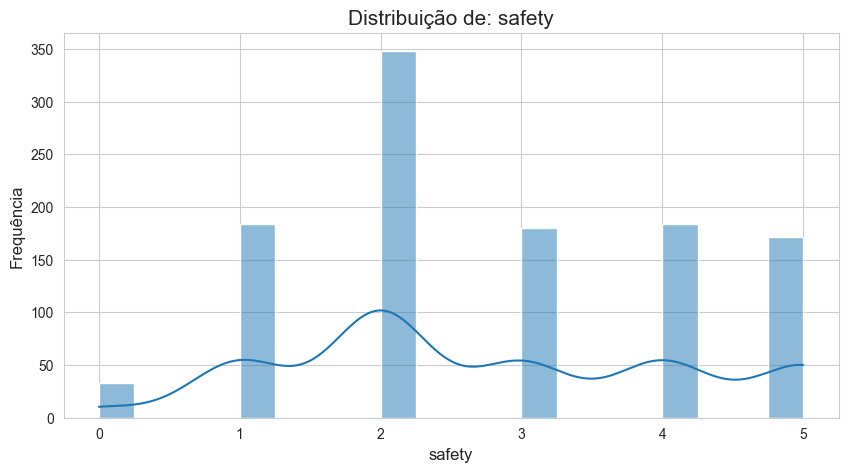

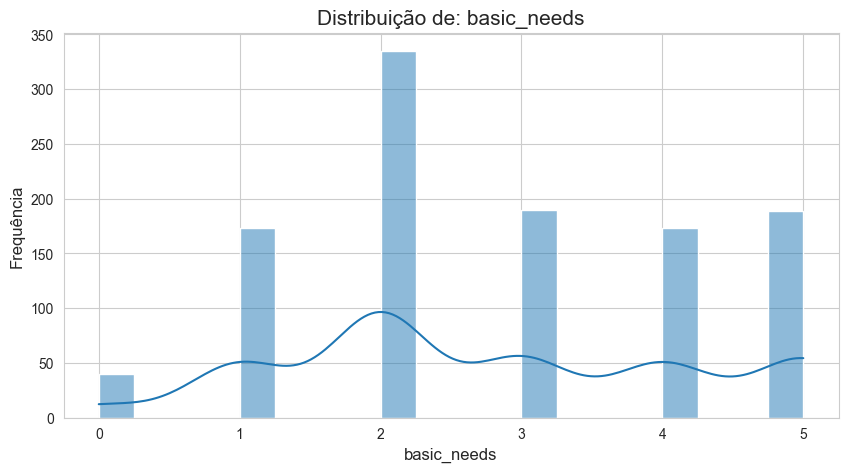

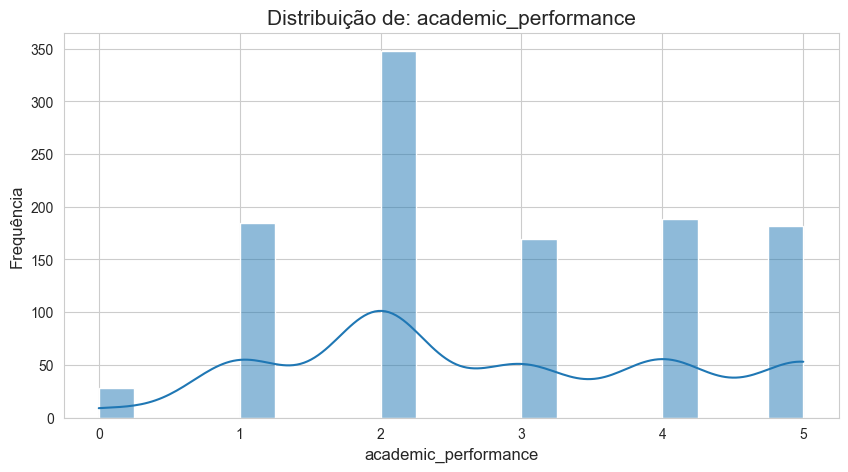

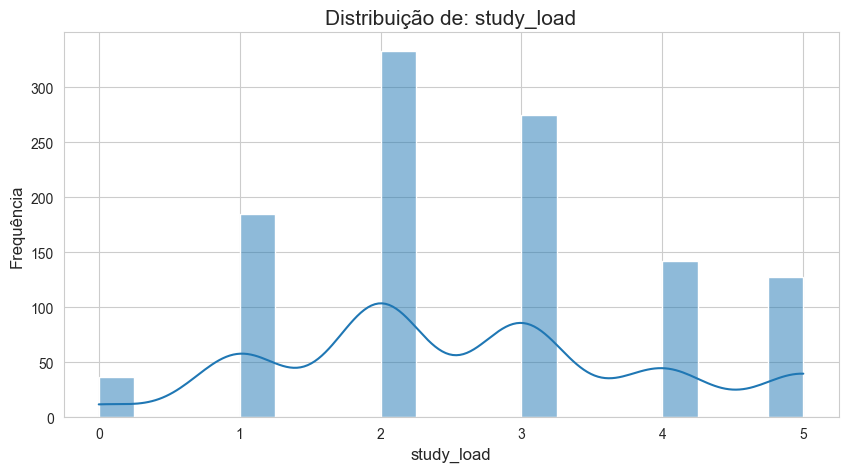

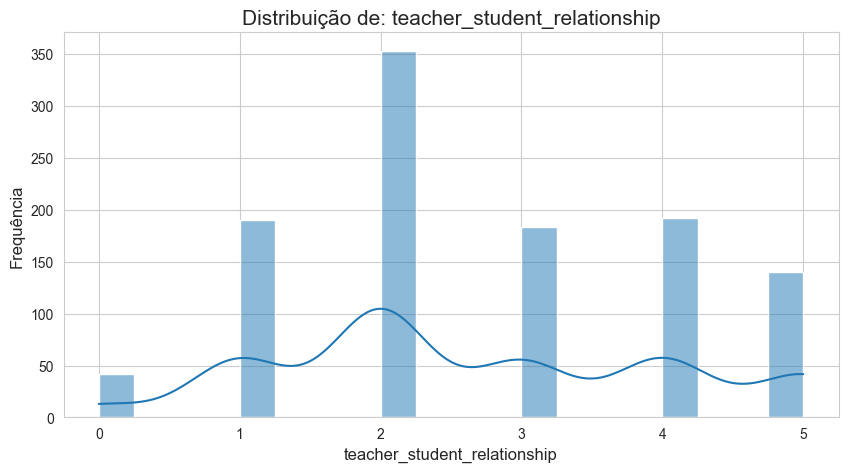

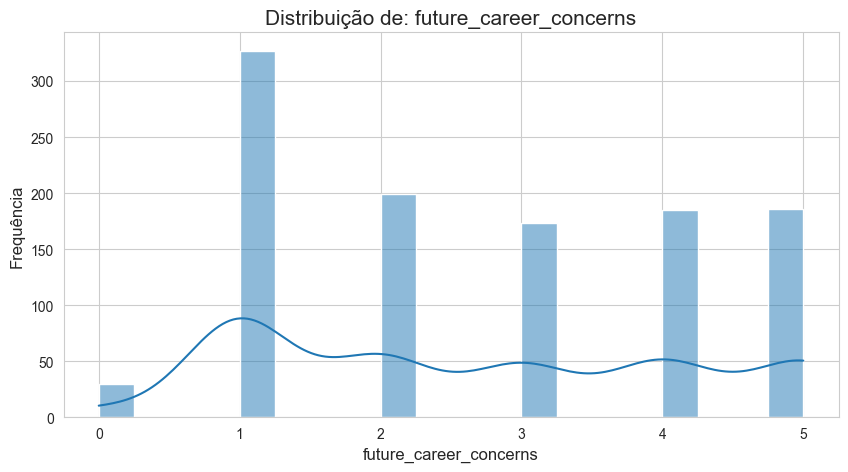

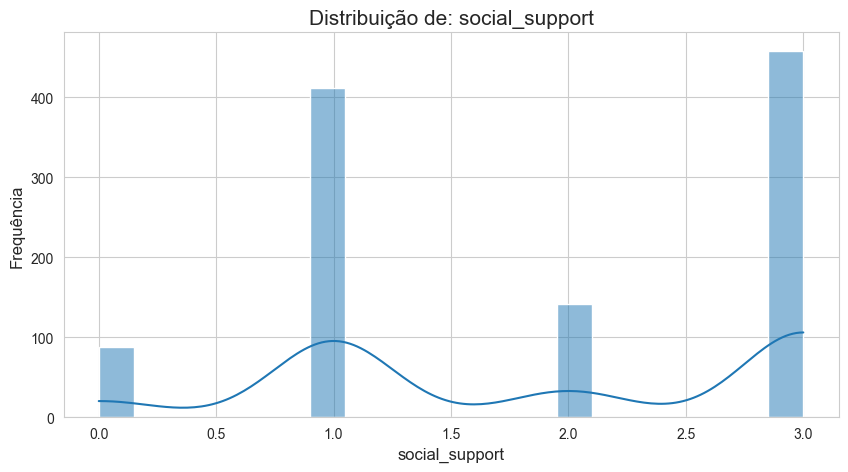

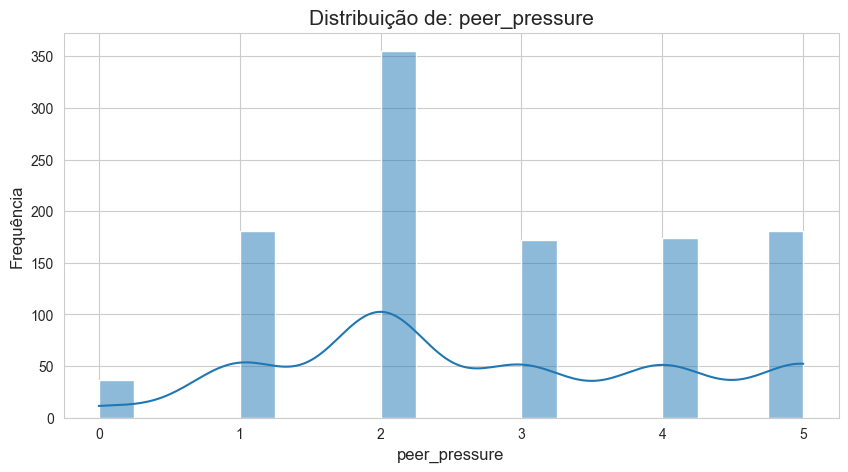

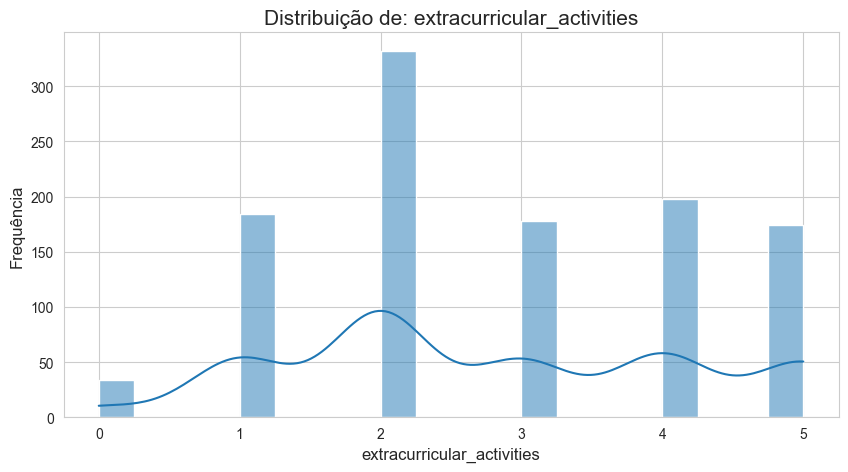

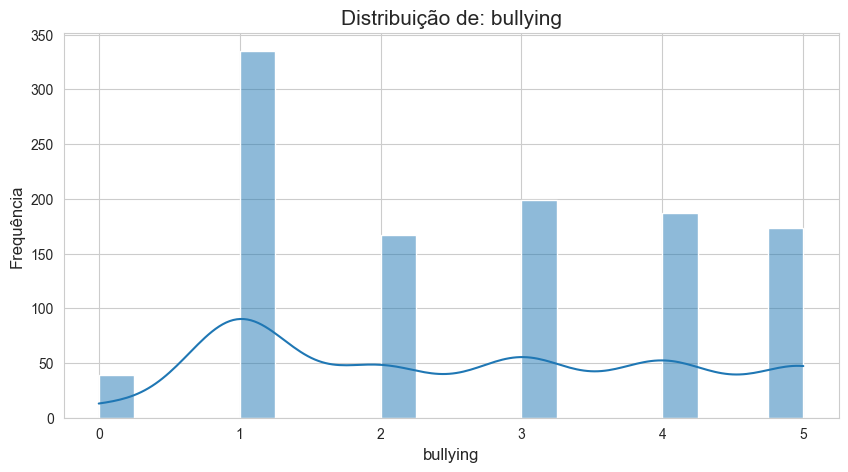

In [6]:
# 2. Análise das Variáveis Preditivas (Features)

# Selecionar todas as colunas, exceto a nossa variável-alvo 'stress_level'
features = df.drop("stress_level", axis=1).columns

# Criar um histograma para cada feature
for feature in features:
    plt.figure(figsize=(10, 5))
    # Usaremos um histograma, ideal para variáveis numéricas/ordinais
    sns.histplot(
        df[feature], kde=True, bins=20
    )  # kde=True adiciona uma linha de densidade
    plt.title(f"Distribuição de: {feature}", fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.show()